In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (25,11)

In [50]:
df = pd.read_csv('top250-00-19.csv')
df.head(5)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [51]:
df.isna().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [52]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

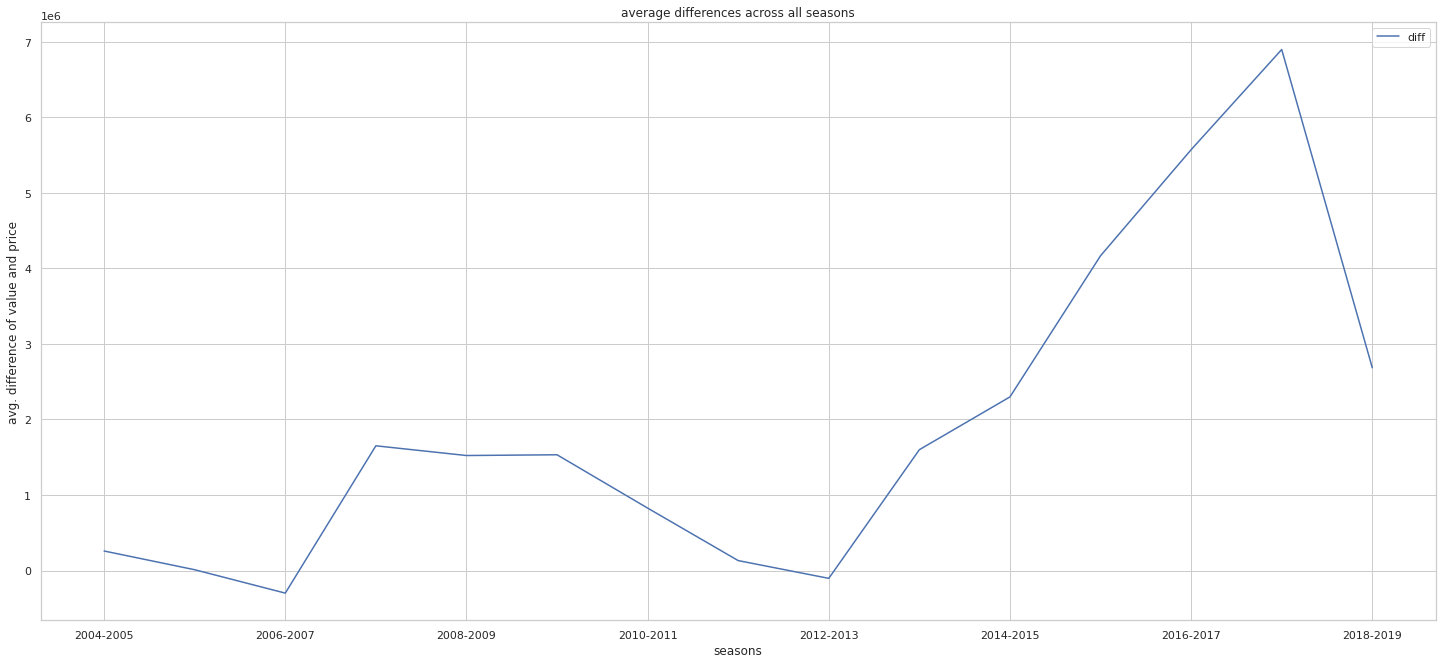

In [53]:
df['diff'] = df['Transfer_fee'] - df['Market_value']
seasons = df.groupby('Season')['diff'].mean().reset_index()
seasons.plot(x='Season', y='diff')
plt.title('average differences across all seasons')
plt.xlabel('seasons')
plt.ylabel('avg. difference of value and price')
plt.show()

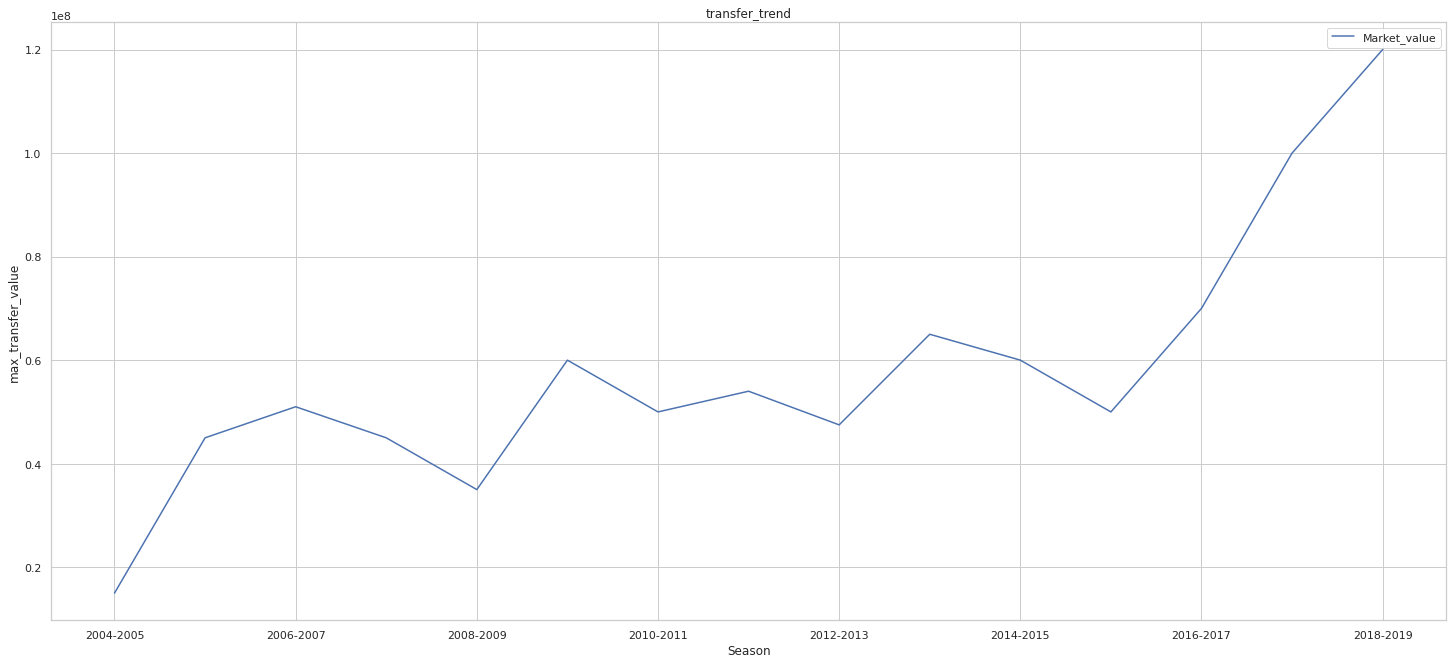

In [54]:
transfer_trend = pd.pivot_table(df, index='Season', values='Market_value', aggfunc=np.max).reset_index()
transfer_trend.plot(x='Season', y='Market_value')
plt.title('transfer_trend')
plt.xlabel('Season')
plt.ylabel('max_transfer_value')
plt.show()

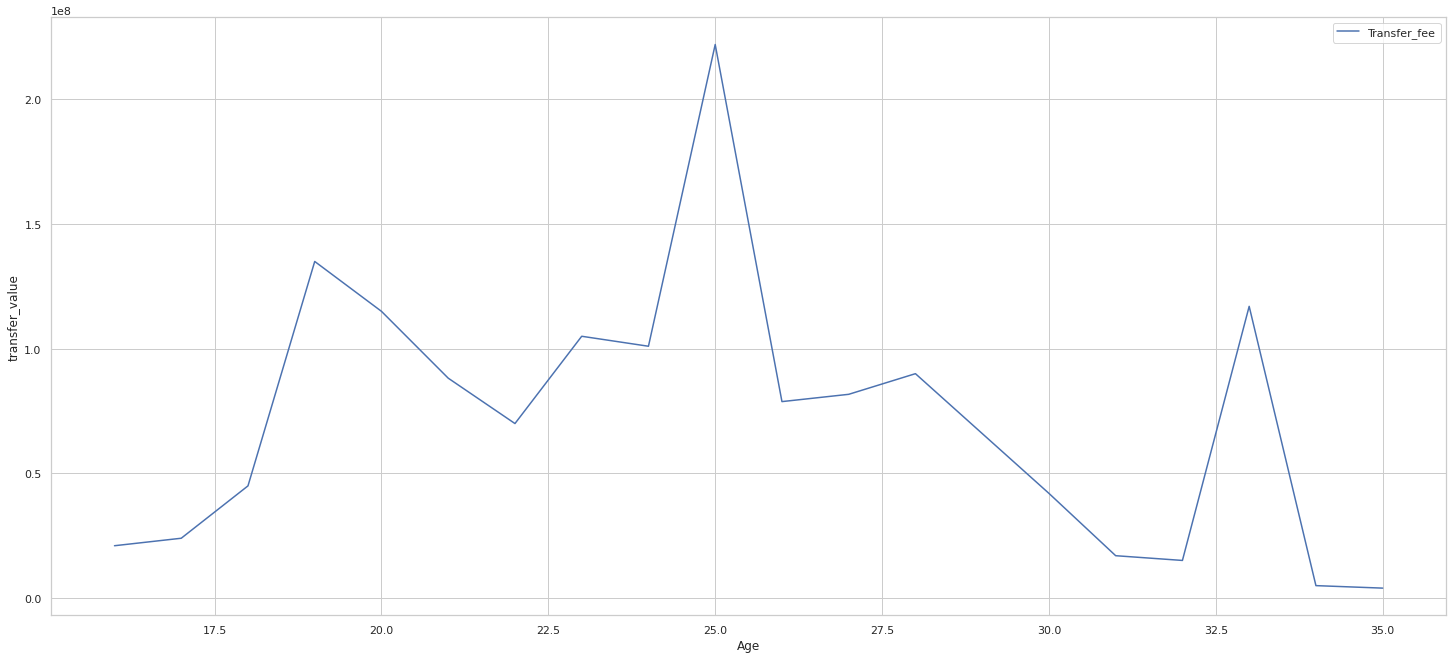

In [55]:
age_variation = pd.pivot_table(df, index='Age', values='Transfer_fee', aggfunc=np.max).reset_index()
age_variation.plot(x='Age', y='Transfer_fee')
plt.xlabel('Age')
plt.ylabel('transfer_value')
plt.show()

<AxesSubplot:xlabel='Position', ylabel='count'>

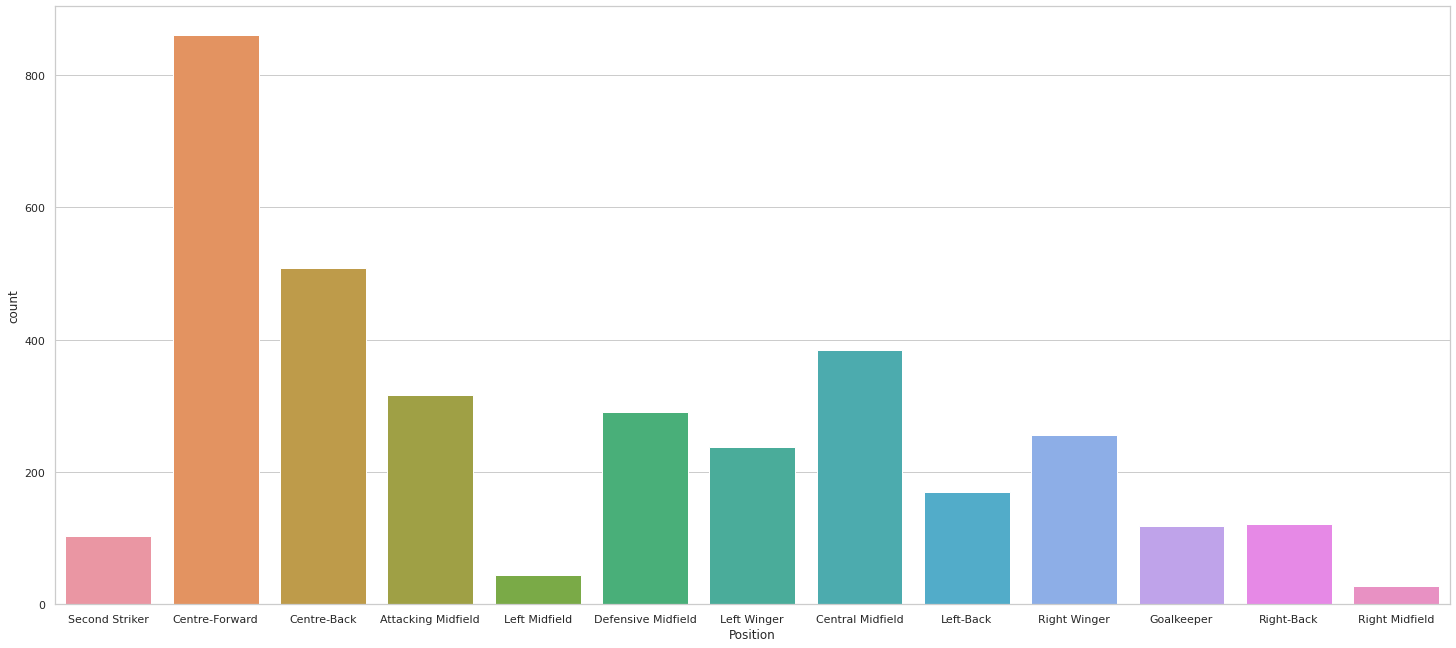

In [56]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Position', data=df)

<AxesSubplot:xlabel='Position', ylabel='Market_value'>

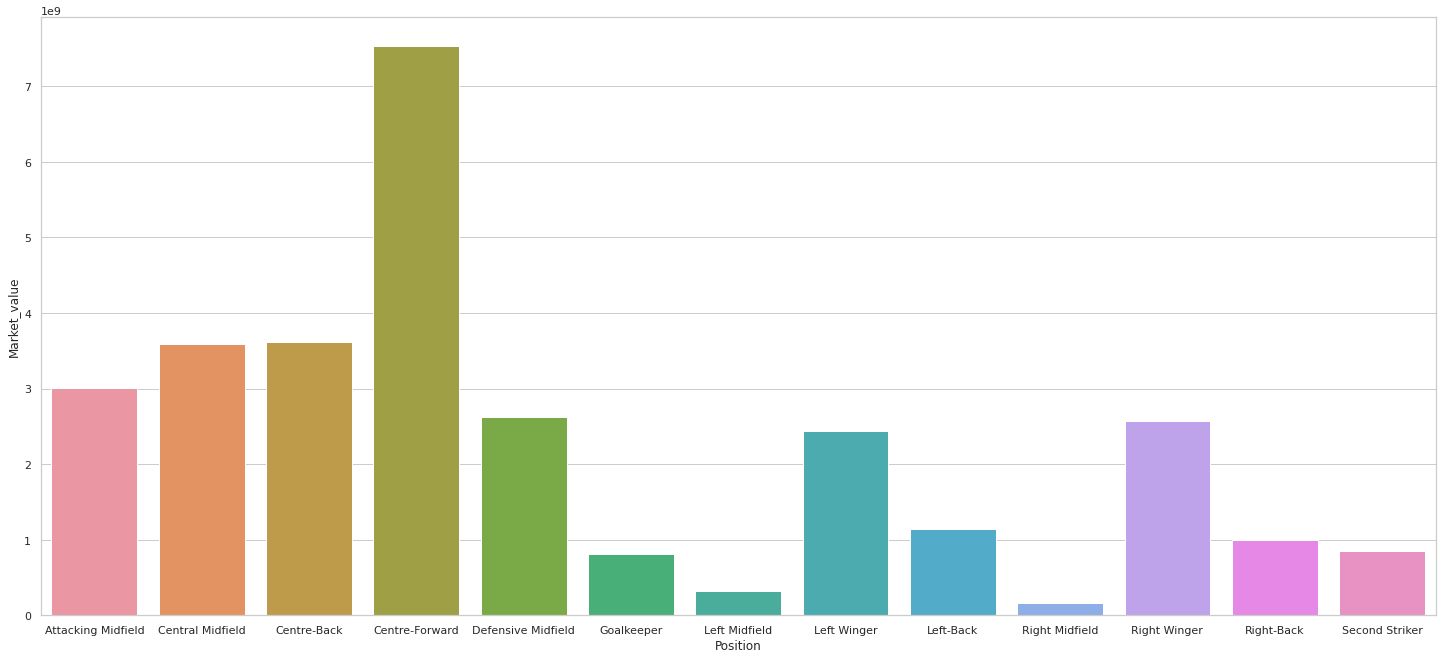

In [57]:
position_df = pd.pivot_table(df, index='Position', values='Market_value', aggfunc=np.sum).reset_index()
sns.barplot(x='Position', y='Market_value', data=position_df)

<AxesSubplot:xlabel='Position', ylabel='Market_value'>

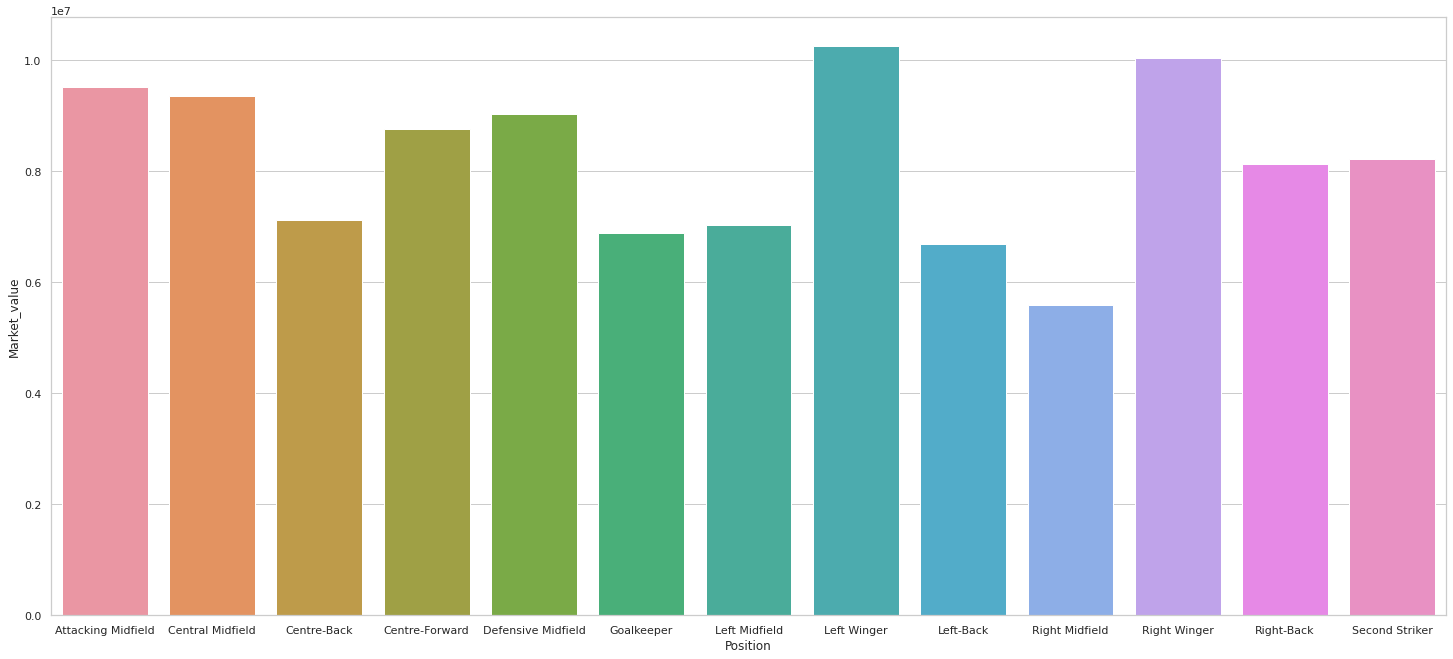

In [58]:
avg_fee_pos = pd.pivot_table(df, index='Position', values='Market_value', aggfunc=np.mean).reset_index()
sns.barplot(x='Position', y='Market_value', data=avg_fee_pos)

<AxesSubplot:xlabel='Position', ylabel='Market_value'>

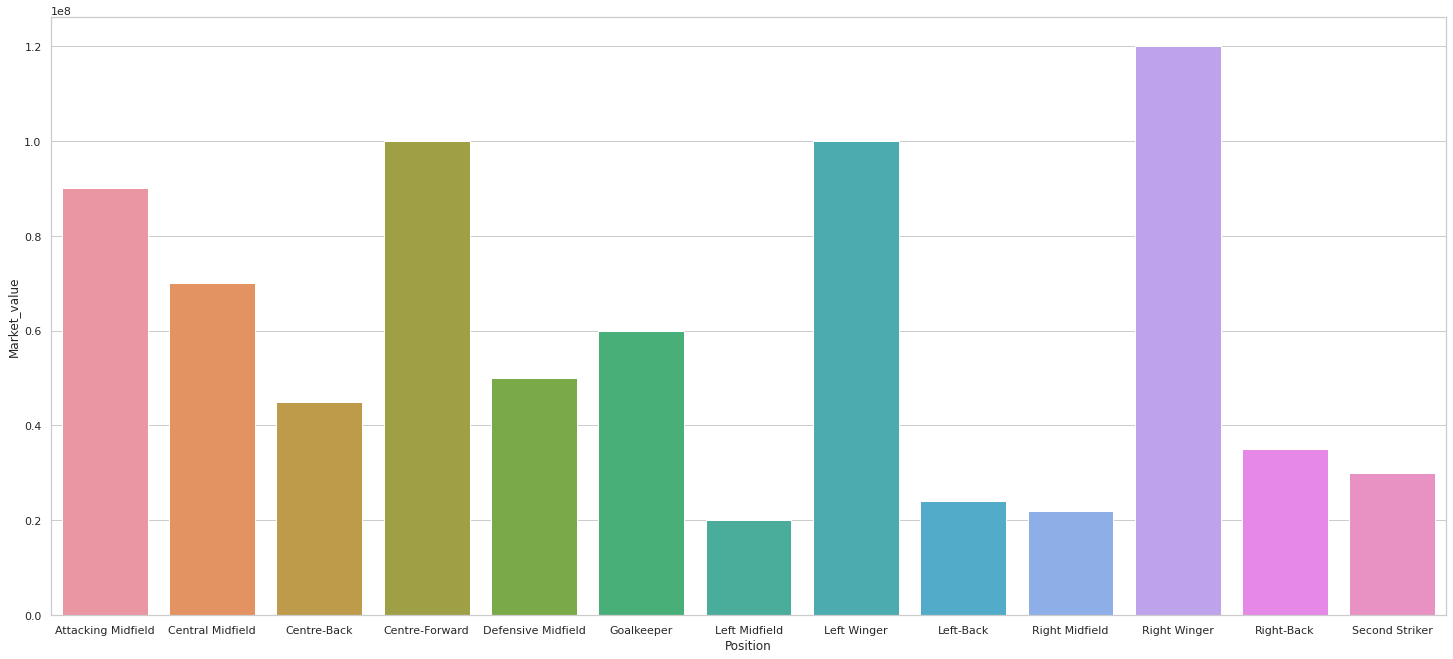

In [59]:
max_value_pos = pd.pivot_table(df, index='Position', values='Market_value', aggfunc=np.max).reset_index()
sns.barplot(x='Position', y='Market_value', data=max_value_pos)

<AxesSubplot:xlabel='League_from', ylabel='Market_value'>

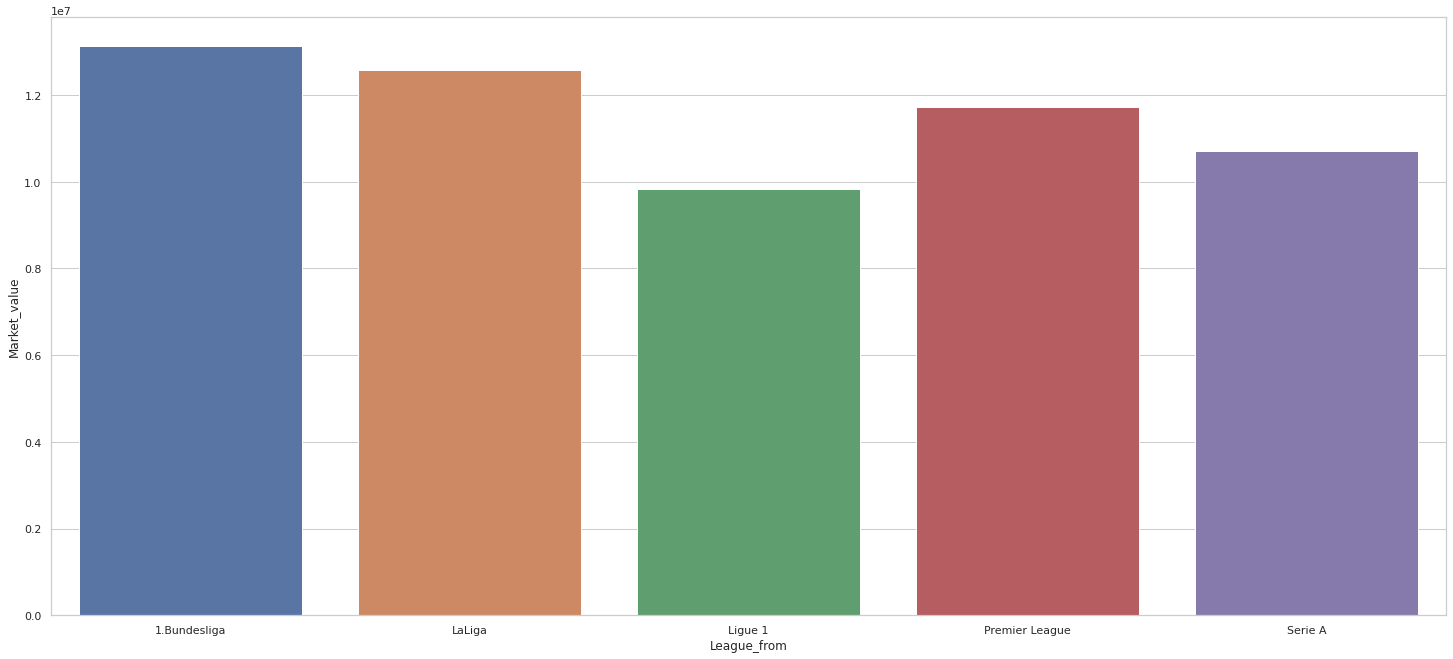

In [60]:
options = ['LaLiga', 'Serie A', 'Premier League', 'Ligue 1', '1.Bundesliga']
top5_league = df[(df['League_from'].isin(options)) & (df['League_to'].isin(options))]
league_from = pd.pivot_table(top5_league, index='League_from', values='Market_value', aggfunc=np.mean).reset_index()
sns.barplot(x='League_from', y='Market_value', data=league_from)

<AxesSubplot:xlabel='League_to', ylabel='Market_value'>

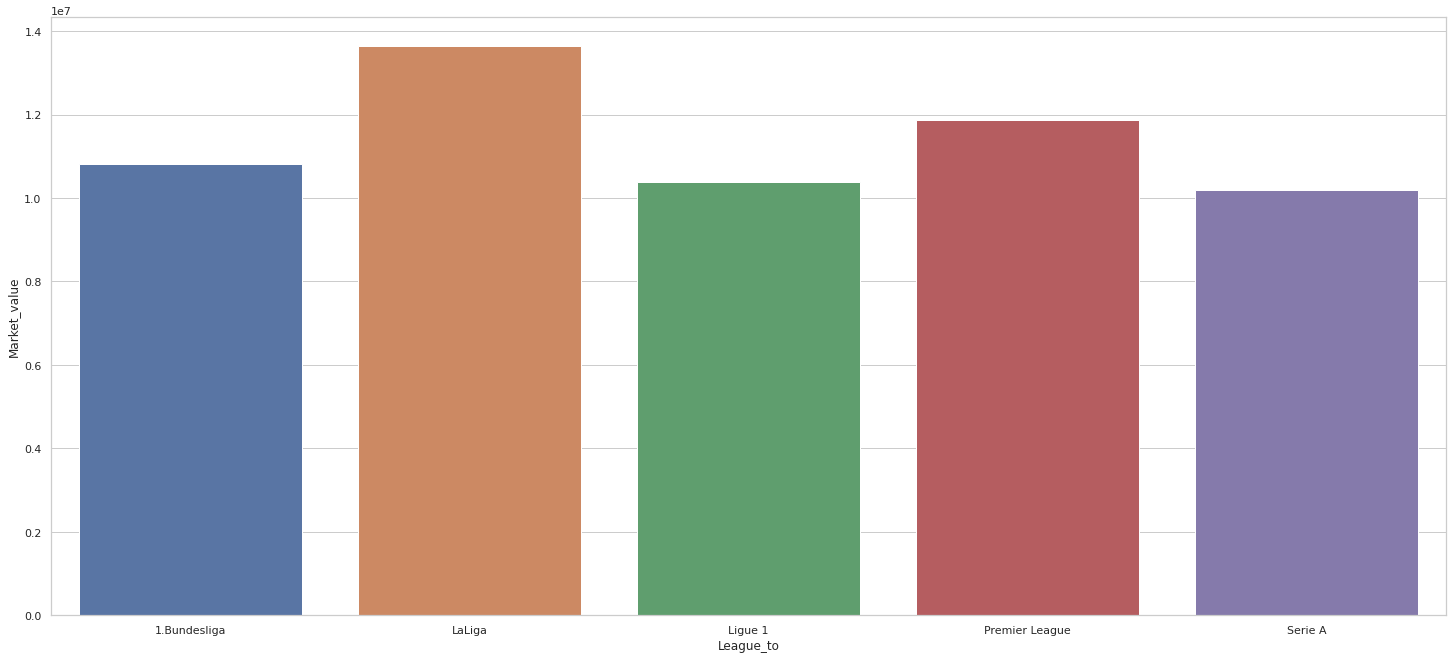

In [61]:
league_to = pd.pivot_table(top5_league, index='League_to', values='Market_value', aggfunc=np.mean).reset_index()
sns.barplot(x='League_to', y='Market_value', data=league_to)

<AxesSubplot:xlabel='League_from', ylabel='Market_value'>

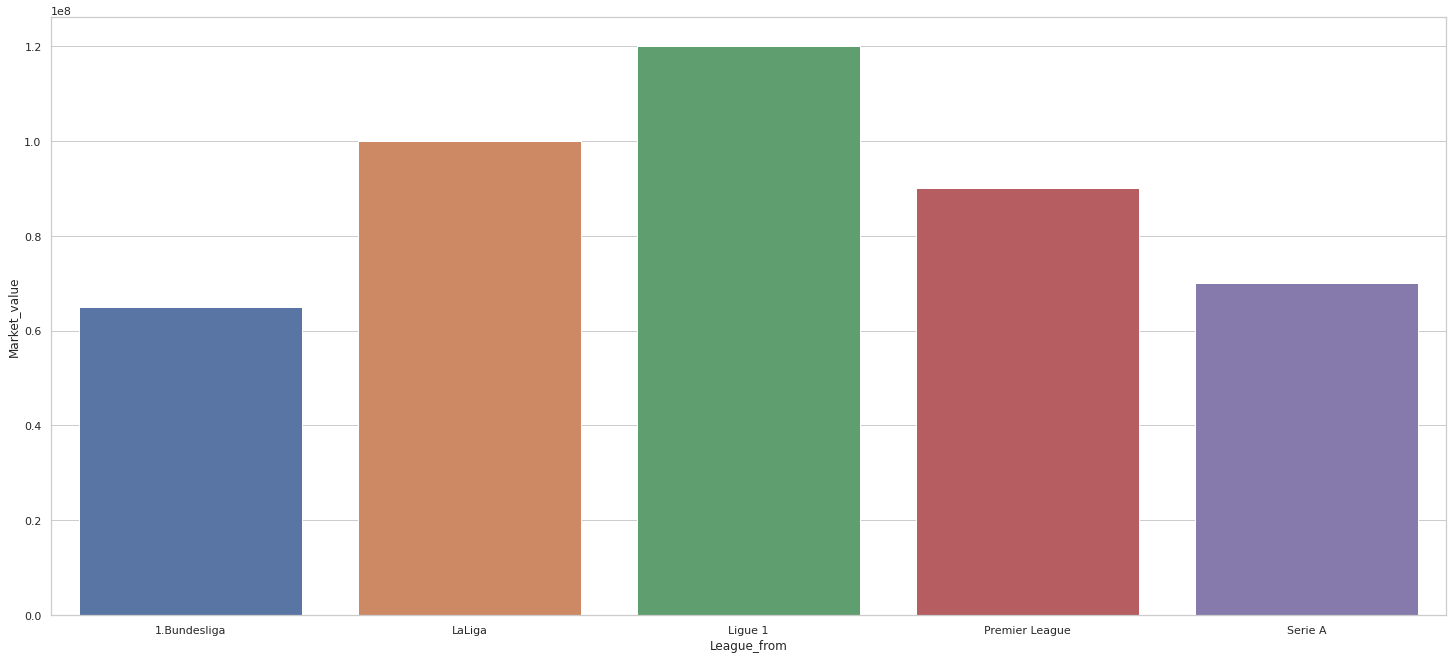

In [62]:
league_from_max = pd.pivot_table(top5_league, index='League_from', values='Market_value', aggfunc=np.max).reset_index()
sns.barplot(x='League_from', y='Market_value', data=league_from_max)

<AxesSubplot:xlabel='League_to', ylabel='Market_value'>

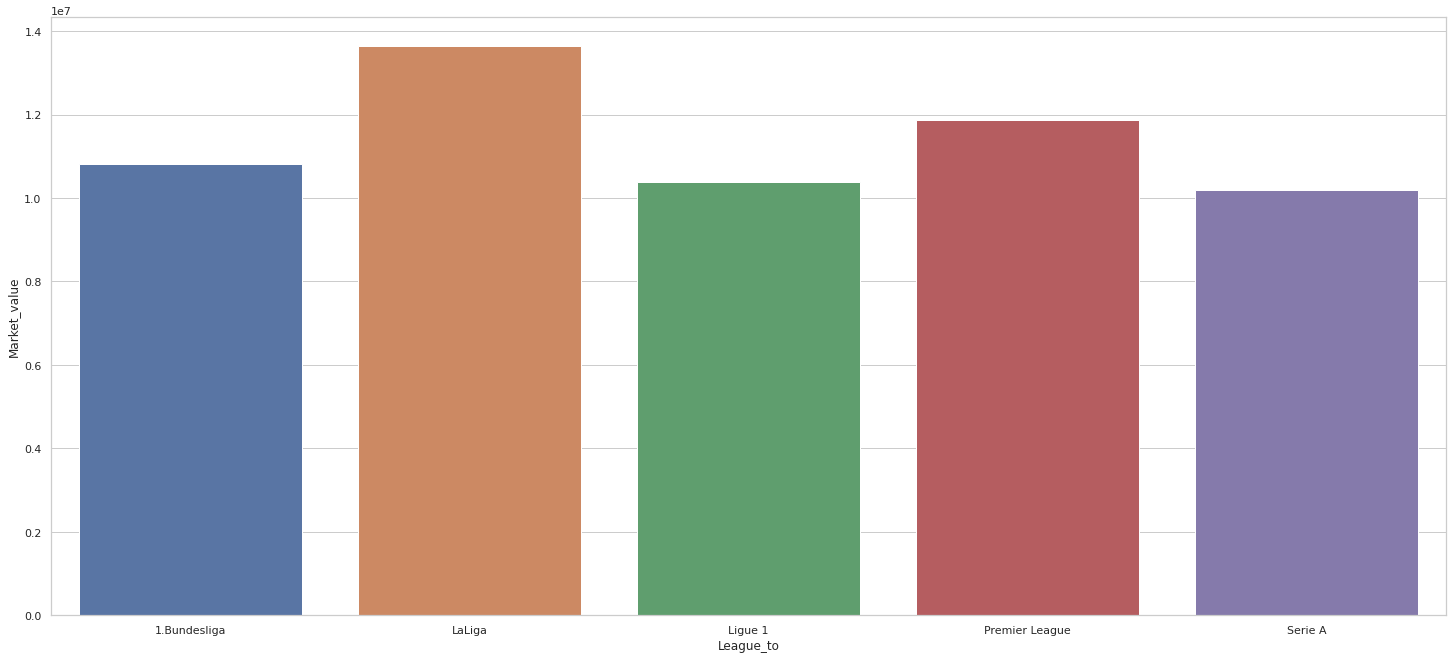

In [63]:
league_to_max = pd.pivot_table(top5_league, index='League_to', values='Market_value', aggfunc=np.mean).reset_index()
sns.barplot(x='League_to', y='Market_value', data=league_to_max)

In [64]:
df.drop('Name', axis=1, inplace=True)
df

,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,diff
0,Second Striker,20,Boca Juniors,Argentina,Corinthians,Série A,2004-2005,15000000.0,15000000,0.0
1,Centre-Forward,18,Lecce,Serie A,Fiorentina,Serie A,2004-2005,13000000.0,14000000,1000000.0
2,Centre-Back,27,CSKA Moscow,Premier Liga,Chelsea,Premier League,2004-2005,5000000.0,12000000,7000000.0
3,Centre-Back,25,Rangers,Premiership,Newcastle,Premier League,2004-2005,8500000.0,11300000,2800000.0
4,Centre-Forward,25,Man City,Premier League,Fenerbahce,Süper Lig,2004-2005,15000000.0,10700000,-4300000.0
...,...,...,...,...,...,...,...,...,...,...
3435,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000,-200000.0
3436,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000,1800000.0
3437,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000,-4000000.0
3438,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000,0.0


In [65]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.Position = labelencoder.fit_transform(df['Position'].values.reshape(-1,1))
df.Team_from = labelencoder.fit_transform(df['Team_from'].values.reshape(-1,1))
df.League_from = labelencoder.fit_transform(df['League_from'].values.reshape(-1,1))
df.Team_to = labelencoder.fit_transform(df['Team_to'].values.reshape(-1,1))
df.League_to = labelencoder.fit_transform(df['League_to'].values.reshape(-1,1))

/home/sanial/PycharmProjects/football_transfer/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
dependent_variable = df.iloc[:, :6].values
independent_variable = df.iloc[:, 7].values

In [71]:
from sklearn.model_selection import train_test_split
dependent_variable_train, dependent_variable_test, independent_variable_train, independent_variable_test = train_test_split(dependent_variable, independent_variable, test_size=0.2, random_state=0)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(dependent_variable_train, independent_variable_train)
classifier.score(dependent_variable_train, independent_variable_train)

0.2590843023255814